In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!unrar x "images.rar" extracted_images/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from images.rar

Creating    extracted_images                                          OK
Creating    extracted_images/images                                   OK
Creating    extracted_images/images/cristiano                         OK
Extracting  extracted_images/images/cristiano/woods1.jpg                   0%  OK 
Extracting  extracted_images/images/cristiano/woods10.jpg                  0%  OK 
Extracting  extracted_images/images/cristiano/woods100.jpg                 0%  OK 
Extracting  extracted_images/images/cristiano/woods101.jpg                 0%  OK 
Extracting  extracted_images/images/cristiano/woods102.jpg                 0%  OK 
Extracting  extracted_images/images/cristiano/woods103.jpg                 0%  OK 
Extracting  extracted_images/images/cristiano/woods104.jpg                 0%  OK 
Extracting  extracted_images/imag

In [ ]:
!pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

In [ ]:
import os
import torch
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import numpy as np

# ------------------------
# Step 1: Set up MTCNN (for face detection) and ResNet (for embeddings)
# ------------------------

# Initialize MTCNN for face detection
mtcnn = MTCNN(image_size=160, margin=20, keep_all=False, post_process=True)

# Initialize the InceptionResnetV1 model (pre-trained for generating face embeddings)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

# ------------------------
# Step 2: Define paths
# ------------------------

# Define the path where the images are stored
dataset_path = '/content/extracted_images/images'

# Lists to store embeddings and labels
embedding_list = []    # This will store the 512D embeddings for each image
name_list = []         # This will store the names of the people corresponding to the images

# ------------------------
# Step 3: List subfolders (people) in the 'images' folder
# ------------------------

# List all the subfolders inside the 'images' folder
people_folders = os.listdir(dataset_path)

# Filter out any non-folder entries (e.g., if there are any files in the 'images' folder)
people_folders = [folder for folder in people_folders if os.path.isdir(os.path.join(dataset_path, folder))]

# Print the names of the subfolders (people)
print(f"People in dataset: {people_folders}")

# ------------------------
# Debugging: Show the structure of the dataset
# ------------------------

for person_name in people_folders:
    person_folder = os.path.join(dataset_path, person_name)

    # List image files for each person
    image_files = os.listdir(person_folder)
    print(f"\nImages for {person_name}: {image_files}")


People in dataset: ['john cena', 'kobe', 'maria', 'kohli', 'cristiano']

Images for john cena: ['woods29.jpg', 'woods100.jpg', 'woods20.jpg', 'woods34.jpg', 'woods14.jpg', 'woods74.jpg', 'woods61.jpg', 'woods70.jpg', 'woods69.jpg', 'woods4.jpg', 'woods9.jpg', 'woods13.jpg', 'woods63.jpg', 'woods24.jpg', 'woods85.jpg', 'woods49.jpg', 'woods32.jpg', 'woods47.jpg', 'woods91.jpg', 'woods67.jpg', 'woods107.jpg', 'woods25.jpg', 'woods92.jpg', 'woods73.jpg', 'woods23.jpg', 'woods89.jpg', 'woods96.jpg', 'woods46.jpg', 'woods27.jpg', 'woods93.jpg', 'woods53.jpg', 'woods54.jpg', 'woods87.jpg', 'woods39.jpg', 'woods106.jpg', 'woods77.jpg', 'woods16.jpg', 'woods75.jpg', 'woods65.jpg', 'woods64.jpg', 'woods71.jpg', 'woods68.jpg', 'woods55.jpg', 'woods62.jpg', 'woods95.jpg', 'woods19.jpg', 'woods66.jpg', 'woods48.jpg', 'woods12.jpg', 'woods15.jpg', 'woods102.jpg', 'woods103.jpg', 'woods78.jpg', 'woods31.jpg', 'woods60.jpg', 'woods58.jpg', 'woods3.jpg', 'woods1.jpg', 'woods76.jpg', 'woods52.jpg', 'wo

In [ ]:
# ------------------------
# Step 3: Loop through each person's folder
# ------------------------
from tqdm import tqdm
import os


for person_name in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person_name)

    # Skip non-directory files (Ensure we process only directories)
    if not os.path.isdir(person_folder):
        continue

    print(f"\nProcessing: {person_name}")

    # Loop through each image in the folder
    for image_name in tqdm(os.listdir(person_folder)):
        image_path = os.path.join(person_folder, image_name)

        if not os.path.isfile(image_path):
            continue

        print(f"Processing image: {image_name}")
        try:
            # Open image
            img = Image.open(image_path).convert('RGB')

            # Detect and crop face using MTCNN
            face = mtcnn(img)

            if face is not None:
                # Generate 512D face embedding
                with torch.no_grad():
                    embedding = resnet(face.unsqueeze(0))  # Add batch dim

                # Save embedding and label
                embedding_list.append(embedding.squeeze(0).numpy())
                name_list.append(person_name)
            else:
                print(f"Face not detected in {image_name}")  # Debug: face not detected
        except Exception as e:
            print(f"Error processing {image_name}: {e}")  # Debug: any processing error



Processing: john cena


  0%|          | 0/107 [00:00<?, ?it/s]

Processing image: woods29.jpg


  2%|▏         | 2/107 [00:00<00:21,  4.92it/s]

Processing image: woods100.jpg
Processing image: woods20.jpg


  4%|▎         | 4/107 [00:00<00:20,  5.01it/s]

Processing image: woods34.jpg
Processing image: woods14.jpg


  6%|▌         | 6/107 [00:01<00:19,  5.20it/s]

Processing image: woods74.jpg
Processing image: woods61.jpg


  7%|▋         | 7/107 [00:01<00:19,  5.03it/s]

Processing image: woods70.jpg


  8%|▊         | 9/107 [00:01<00:18,  5.20it/s]

Processing image: woods69.jpg
Processing image: woods4.jpg


 10%|█         | 11/107 [00:02<00:17,  5.45it/s]

Processing image: woods9.jpg
Processing image: woods13.jpg


 11%|█         | 12/107 [00:02<00:17,  5.58it/s]

Processing image: woods63.jpg


 13%|█▎        | 14/107 [00:02<00:19,  4.86it/s]

Processing image: woods24.jpg
Processing image: woods85.jpg


 15%|█▍        | 16/107 [00:03<00:16,  5.41it/s]

Processing image: woods49.jpg
Processing image: woods32.jpg


 17%|█▋        | 18/107 [00:03<00:16,  5.38it/s]

Processing image: woods47.jpg
Processing image: woods91.jpg


 19%|█▊        | 20/107 [00:03<00:16,  5.23it/s]

Processing image: woods67.jpg
Processing image: woods107.jpg


 21%|██        | 22/107 [00:04<00:15,  5.52it/s]

Processing image: woods25.jpg
Processing image: woods92.jpg


 22%|██▏       | 24/107 [00:04<00:14,  5.84it/s]

Processing image: woods73.jpg
Processing image: woods23.jpg


 24%|██▍       | 26/107 [00:04<00:15,  5.37it/s]

Processing image: woods89.jpg
Processing image: woods96.jpg


 26%|██▌       | 28/107 [00:05<00:14,  5.62it/s]

Processing image: woods46.jpg
Processing image: woods27.jpg


 28%|██▊       | 30/107 [00:05<00:13,  5.70it/s]

Processing image: woods93.jpg
Processing image: woods53.jpg


 30%|██▉       | 32/107 [00:05<00:12,  6.08it/s]

Processing image: woods54.jpg
Processing image: woods87.jpg


 32%|███▏      | 34/107 [00:06<00:12,  5.88it/s]

Processing image: woods39.jpg
Processing image: woods106.jpg


 33%|███▎      | 35/107 [00:06<00:12,  5.77it/s]

Processing image: woods77.jpg


 35%|███▍      | 37/107 [00:06<00:13,  5.24it/s]

Processing image: woods16.jpg
Processing image: woods75.jpg


 36%|███▌      | 38/107 [00:07<00:15,  4.55it/s]

Processing image: woods65.jpg


 36%|███▋      | 39/107 [00:07<00:16,  4.21it/s]

Processing image: woods64.jpg


 37%|███▋      | 40/107 [00:08<00:26,  2.54it/s]

Processing image: woods71.jpg


 38%|███▊      | 41/107 [00:08<00:23,  2.84it/s]

Processing image: woods68.jpg


 39%|███▉      | 42/107 [00:08<00:20,  3.21it/s]

Processing image: woods55.jpg


 40%|████      | 43/107 [00:08<00:19,  3.34it/s]

Processing image: woods62.jpg


 41%|████      | 44/107 [00:09<00:17,  3.54it/s]

Processing image: woods95.jpg


 42%|████▏     | 45/107 [00:09<00:17,  3.59it/s]

Processing image: woods19.jpg


 44%|████▍     | 47/107 [00:09<00:14,  4.00it/s]

Processing image: woods66.jpg
Processing image: woods48.jpg


 45%|████▍     | 48/107 [00:10<00:13,  4.43it/s]

Processing image: woods12.jpg


 47%|████▋     | 50/107 [00:10<00:12,  4.64it/s]

Processing image: woods15.jpg
Processing image: woods102.jpg


 49%|████▊     | 52/107 [00:10<00:10,  5.41it/s]

Processing image: woods103.jpg
Processing image: woods78.jpg


 50%|█████     | 54/107 [00:11<00:09,  5.63it/s]

Processing image: woods31.jpg
Processing image: woods60.jpg


 51%|█████▏    | 55/107 [00:11<00:09,  5.72it/s]

Processing image: woods58.jpg


 52%|█████▏    | 56/107 [00:11<00:10,  4.91it/s]

Processing image: woods3.jpg


 53%|█████▎    | 57/107 [00:11<00:10,  4.72it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 54%|█████▍    | 58/107 [00:12<00:09,  5.19it/s]

Processing image: woods1.jpg
Face not detected in woods1.jpg
Processing image: woods76.jpg


 56%|█████▌    | 60/107 [00:12<00:09,  4.78it/s]

Processing image: woods52.jpg
Processing image: woods90.jpg


 58%|█████▊    | 62/107 [00:12<00:08,  5.03it/s]

Processing image: woods99.jpg
Processing image: woods98.jpg


 59%|█████▉    | 63/107 [00:13<00:09,  4.41it/s]

Processing image: woods35.jpg


 61%|██████    | 65/107 [00:13<00:08,  4.81it/s]

Processing image: woods82.jpg
Processing image: woods8.jpg


 63%|██████▎   | 67/107 [00:13<00:07,  5.26it/s]

Processing image: woods105.jpg
Processing image: woods83.jpg


 64%|██████▎   | 68/107 [00:14<00:07,  5.43it/s]

Processing image: woods6.jpg


 64%|██████▍   | 69/107 [00:14<00:07,  4.98it/s]

Processing image: woods18.jpg


 65%|██████▌   | 70/107 [00:14<00:08,  4.50it/s]

Processing image: woods21.jpg


 67%|██████▋   | 72/107 [00:14<00:06,  5.05it/s]

Processing image: woods38.jpg
Processing image: woods5.jpg


 69%|██████▉   | 74/107 [00:15<00:05,  5.70it/s]

Processing image: woods10.jpg
Processing image: woods17.jpg


 70%|███████   | 75/107 [00:15<00:05,  5.37it/s]

Processing image: woods104.jpg


 71%|███████   | 76/107 [00:15<00:06,  4.98it/s]

Processing image: woods97.jpg


 73%|███████▎  | 78/107 [00:16<00:05,  5.12it/s]

Processing image: woods86.jpg
Processing image: woods22.jpg


 75%|███████▍  | 80/107 [00:16<00:05,  5.23it/s]

Processing image: woods41.jpg
Processing image: woods56.jpg


 77%|███████▋  | 82/107 [00:16<00:04,  5.60it/s]

Processing image: woods45.jpg
Processing image: woods40.jpg


 79%|███████▊  | 84/107 [00:17<00:03,  5.76it/s]

Processing image: woods84.jpg
Processing image: woods7.jpg


 80%|████████  | 86/107 [00:17<00:03,  5.76it/s]

Processing image: woods79.jpg
Processing image: woods51.jpg


 81%|████████▏ | 87/107 [00:17<00:03,  5.97it/s]

Processing image: woods28.jpg


 82%|████████▏ | 88/107 [00:17<00:03,  5.41it/s]

Processing image: woods80.jpg


 84%|████████▍ | 90/107 [00:18<00:03,  5.42it/s]

Processing image: woods50.jpg
Processing image: woods94.jpg


 86%|████████▌ | 92/107 [00:18<00:02,  5.72it/s]

Processing image: woods88.jpg
Processing image: woods57.jpg


 88%|████████▊ | 94/107 [00:18<00:02,  5.78it/s]

Processing image: woods33.jpg
Processing image: woods11.jpg


 90%|████████▉ | 96/107 [00:19<00:01,  5.97it/s]

Processing image: woods36.jpg
Processing image: woods72.jpg


 92%|█████████▏| 98/107 [00:19<00:01,  4.93it/s]

Processing image: woods37.jpg
Processing image: woods44.jpg


 93%|█████████▎| 99/107 [00:19<00:01,  4.38it/s]

Processing image: woods30.jpg


 93%|█████████▎| 100/107 [00:20<00:01,  3.64it/s]

Processing image: woods2.jpg


 94%|█████████▍| 101/107 [00:20<00:01,  3.84it/s]

Processing image: woods59.jpg


 95%|█████████▌| 102/107 [00:20<00:01,  3.71it/s]

Processing image: woods101.jpg


 96%|█████████▋| 103/107 [00:21<00:01,  3.42it/s]

Processing image: woods43.jpg


 97%|█████████▋| 104/107 [00:21<00:00,  3.55it/s]

Processing image: woods42.jpg


 98%|█████████▊| 105/107 [00:21<00:00,  3.54it/s]

Processing image: woods81.jpg


 99%|█████████▉| 106/107 [00:22<00:00,  3.20it/s]

Processing image: woods26.jpg


100%|██████████| 107/107 [00:22<00:00,  4.78it/s]



Processing: kobe


  0%|          | 0/171 [00:00<?, ?it/s]

Processing image: woods129.jpg


  1%|          | 2/171 [00:00<00:41,  4.12it/s]

Processing image: woods29.jpg
Processing image: woods100.jpg


  2%|▏         | 3/171 [00:00<00:32,  5.10it/s]

Processing image: woods131.jpg


  3%|▎         | 5/171 [00:01<00:33,  5.02it/s]

Processing image: woods20.jpg
Processing image: woods34.jpg


  4%|▎         | 6/171 [00:01<00:32,  5.13it/s]

Processing image: woods126.jpg


  4%|▍         | 7/171 [00:01<00:42,  3.82it/s]

Processing image: woods136.jpg


  5%|▌         | 9/171 [00:02<00:39,  4.05it/s]

Processing image: woods14.jpg
Processing image: woods74.jpg


  6%|▋         | 11/171 [00:02<00:36,  4.44it/s]

Processing image: woods61.jpg
Processing image: woods145.jpg


  7%|▋         | 12/171 [00:02<00:41,  3.80it/s]

Processing image: woods70.jpg


  8%|▊         | 13/171 [00:03<00:39,  4.04it/s]

Processing image: woods69.jpg
Face not detected in woods69.jpg
Processing image: woods168.jpg


  9%|▉         | 16/171 [00:03<00:29,  5.25it/s]

Processing image: woods4.jpg


 10%|▉         | 17/171 [00:03<00:28,  5.38it/s]

Processing image: woods9.jpg
Processing image: woods13.jpg


 11%|█         | 18/171 [00:03<00:28,  5.42it/s]

Processing image: woods63.jpg


 11%|█         | 19/171 [00:04<00:29,  5.12it/s]

Processing image: woods24.jpg


 12%|█▏        | 21/171 [00:04<00:30,  4.92it/s]

Processing image: woods85.jpg
Processing image: woods49.jpg


 13%|█▎        | 23/171 [00:04<00:27,  5.42it/s]

Processing image: woods112.jpg
Processing image: woods32.jpg


 14%|█▍        | 24/171 [00:05<00:48,  3.05it/s]

Processing image: woods47.jpg


 15%|█▌        | 26/171 [00:05<00:35,  4.08it/s]

Processing image: woods91.jpg
Processing image: woods135.jpg


 16%|█▌        | 27/171 [00:06<00:47,  3.04it/s]

Processing image: woods108.jpg


 17%|█▋        | 29/171 [00:06<00:37,  3.81it/s]

Processing image: woods67.jpg
Processing image: woods107.jpg


 18%|█▊        | 30/171 [00:07<00:32,  4.38it/s]

Processing image: woods25.jpg


 18%|█▊        | 31/171 [00:07<00:35,  3.91it/s]

Processing image: woods114.jpg


 19%|█▉        | 33/171 [00:07<00:36,  3.81it/s]

Processing image: woods92.jpg
Processing image: woods157.jpg


 20%|█▉        | 34/171 [00:08<00:33,  4.03it/s]

Processing image: woods73.jpg


 21%|██        | 36/171 [00:08<00:30,  4.50it/s]

Processing image: woods127.jpg
Processing image: woods143.jpg


 22%|██▏       | 38/171 [00:08<00:28,  4.60it/s]

Processing image: woods23.jpg
Processing image: woods134.jpg


 23%|██▎       | 39/171 [00:09<00:27,  4.82it/s]

Processing image: woods89.jpg
Face not detected in woods89.jpg
Processing image: woods96.jpg


 25%|██▍       | 42/171 [00:09<00:21,  6.14it/s]

Processing image: woods46.jpg
Processing image: woods27.jpg


 25%|██▌       | 43/171 [00:09<00:21,  5.88it/s]

Processing image: woods154.jpg


 26%|██▋       | 45/171 [00:10<00:21,  5.76it/s]

Processing image: woods93.jpg
Processing image: woods53.jpg


 27%|██▋       | 46/171 [00:10<00:24,  5.03it/s]

Processing image: woods54.jpg


 27%|██▋       | 47/171 [00:10<00:28,  4.31it/s]

Processing image: woods128.jpg


 28%|██▊       | 48/171 [00:10<00:30,  4.02it/s]

Processing image: woods144.jpg


 29%|██▊       | 49/171 [00:11<00:32,  3.78it/s]

Processing image: woods87.jpg


 29%|██▉       | 50/171 [00:11<00:30,  3.93it/s]

Processing image: woods119.jpg


 30%|██▉       | 51/171 [00:11<00:36,  3.25it/s]

Processing image: woods140.jpg


 30%|███       | 52/171 [00:12<00:36,  3.26it/s]

Processing image: woods39.jpg


 31%|███       | 53/171 [00:12<00:35,  3.33it/s]

Processing image: woods158.jpg


 32%|███▏      | 54/171 [00:12<00:36,  3.24it/s]

Processing image: woods106.jpg


 32%|███▏      | 55/171 [00:13<00:32,  3.58it/s]

Processing image: woods110.jpg


 33%|███▎      | 56/171 [00:13<00:30,  3.73it/s]

Processing image: woods77.jpg
Face not detected in woods77.jpg
Processing image: woods115.jpg


 35%|███▍      | 59/171 [00:14<00:28,  3.89it/s]

Processing image: woods16.jpg
Processing image: woods75.jpg


 35%|███▌      | 60/171 [00:14<00:26,  4.26it/s]

Processing image: woods65.jpg


 36%|███▌      | 61/171 [00:14<00:25,  4.38it/s]

Processing image: woods64.jpg
Face not detected in woods64.jpg
Processing image: woods71.jpg


 37%|███▋      | 64/171 [00:14<00:21,  5.05it/s]

Processing image: woods68.jpg
Processing image: woods156.jpg


 39%|███▊      | 66/171 [00:15<00:21,  4.97it/s]

Processing image: woods125.jpg
Processing image: woods55.jpg


 39%|███▉      | 67/171 [00:15<00:20,  5.19it/s]

Processing image: woods62.jpg


 41%|████      | 70/171 [00:15<00:15,  6.56it/s]

Processing image: woods95.jpg
Face not detected in woods95.jpg
Processing image: woods19.jpg
Processing image: woods66.jpg


 42%|████▏     | 72/171 [00:16<00:13,  7.41it/s]

Face not detected in woods66.jpg
Processing image: woods48.jpg
Processing image: woods12.jpg


 43%|████▎     | 74/171 [00:16<00:15,  6.37it/s]

Processing image: woods150.jpg
Processing image: woods15.jpg


 44%|████▍     | 75/171 [00:16<00:15,  6.34it/s]

Processing image: woods102.jpg
Face not detected in woods102.jpg
Processing image: woods103.jpg


 46%|████▌     | 78/171 [00:17<00:14,  6.24it/s]

Processing image: woods78.jpg
Processing image: woods31.jpg


 46%|████▌     | 79/171 [00:17<00:15,  5.99it/s]

Processing image: woods155.jpg
Face not detected in woods155.jpg
Processing image: woods124.jpg


 47%|████▋     | 81/171 [00:17<00:13,  6.74it/s]

Processing image: woods60.jpg


 48%|████▊     | 82/171 [00:17<00:14,  6.07it/s]

Processing image: woods169.jpg


 49%|████▉     | 84/171 [00:18<00:15,  5.60it/s]

Processing image: woods58.jpg
Processing image: woods3.jpg


 50%|█████     | 86/171 [00:18<00:14,  5.75it/s]

Processing image: woods1.jpg
Face not detected in woods1.jpg
Processing image: woods76.jpg


 51%|█████     | 87/171 [00:18<00:15,  5.49it/s]

Processing image: woods52.jpg


 51%|█████▏    | 88/171 [00:19<00:19,  4.34it/s]

Processing image: woods90.jpg
Face not detected in woods90.jpg
Processing image: woods99.jpg


 53%|█████▎    | 90/171 [00:19<00:15,  5.15it/s]

Processing image: woods121.jpg


 53%|█████▎    | 91/171 [00:19<00:16,  4.83it/s]

Processing image: woods98.jpg


 54%|█████▍    | 92/171 [00:20<00:18,  4.21it/s]

Processing image: woods35.jpg


 54%|█████▍    | 93/171 [00:20<00:18,  4.29it/s]

Processing image: woods82.jpg


 56%|█████▌    | 95/171 [00:20<00:17,  4.44it/s]

Processing image: woods146.jpg
Processing image: woods123.jpg


 56%|█████▌    | 96/171 [00:20<00:17,  4.28it/s]

Processing image: woods160.jpg
Face not detected in woods160.jpg
Processing image: woods8.jpg


 58%|█████▊    | 99/171 [00:21<00:13,  5.20it/s]

Processing image: woods105.jpg
Processing image: woods130.jpg


 59%|█████▉    | 101/171 [00:21<00:13,  5.38it/s]

Processing image: woods83.jpg
Processing image: woods6.jpg


 60%|█████▉    | 102/171 [00:21<00:12,  5.48it/s]

Processing image: woods18.jpg


 60%|██████    | 103/171 [00:22<00:13,  4.95it/s]

Processing image: woods159.jpg


 61%|██████    | 104/171 [00:22<00:14,  4.66it/s]

Processing image: woods120.jpg


 62%|██████▏   | 106/171 [00:22<00:13,  4.87it/s]

Processing image: woods153.jpg
Processing image: woods21.jpg


 63%|██████▎   | 107/171 [00:23<00:12,  5.04it/s]

Processing image: woods170.jpg


 63%|██████▎   | 108/171 [00:23<00:15,  4.00it/s]

Processing image: woods166.jpg


 64%|██████▎   | 109/171 [00:23<00:19,  3.20it/s]

Processing image: woods122.jpg


 64%|██████▍   | 110/171 [00:24<00:18,  3.32it/s]

Processing image: woods165.jpg


 65%|██████▍   | 111/171 [00:24<00:17,  3.40it/s]

Processing image: woods38.jpg


 65%|██████▌   | 112/171 [00:24<00:20,  2.93it/s]

Processing image: woods5.jpg


 66%|██████▌   | 113/171 [00:25<00:20,  2.82it/s]

Processing image: woods118.jpg
Face not detected in woods118.jpg
Processing image: woods10.jpg


 67%|██████▋   | 115/171 [00:25<00:15,  3.66it/s]

Processing image: woods17.jpg


 68%|██████▊   | 116/171 [00:25<00:15,  3.66it/s]

Processing image: woods104.jpg


 69%|██████▉   | 118/171 [00:26<00:13,  3.91it/s]

Processing image: woods141.jpg
Processing image: woods97.jpg


 71%|███████   | 121/171 [00:26<00:08,  5.61it/s]

Processing image: woods86.jpg
Face not detected in woods86.jpg
Processing image: woods22.jpg


 71%|███████▏  | 122/171 [00:26<00:08,  5.50it/s]

Processing image: woods41.jpg
Processing image: woods132.jpg


 73%|███████▎  | 124/171 [00:27<00:08,  5.55it/s]

Processing image: woods56.jpg
Processing image: woods45.jpg


 74%|███████▎  | 126/171 [00:27<00:07,  5.69it/s]

Processing image: woods117.jpg
Processing image: woods164.jpg


 74%|███████▍  | 127/171 [00:27<00:08,  5.27it/s]

Processing image: woods147.jpg


 75%|███████▍  | 128/171 [00:28<00:10,  4.12it/s]

Processing image: woods40.jpg


 75%|███████▌  | 129/171 [00:28<00:09,  4.27it/s]

Processing image: woods84.jpg


 77%|███████▋  | 131/171 [00:28<00:08,  4.73it/s]

Processing image: woods142.jpg
Processing image: woods138.jpg


 77%|███████▋  | 132/171 [00:29<00:08,  4.56it/s]

Processing image: woods7.jpg


 78%|███████▊  | 133/171 [00:29<00:08,  4.65it/s]

Processing image: woods149.jpg


 78%|███████▊  | 134/171 [00:29<00:08,  4.51it/s]

Processing image: woods137.jpg


 79%|███████▉  | 135/171 [00:29<00:08,  4.47it/s]

Processing image: woods162.jpg


 80%|███████▉  | 136/171 [00:29<00:07,  4.59it/s]

Processing image: woods116.jpg


 81%|████████  | 138/171 [00:30<00:06,  4.85it/s]

Processing image: woods79.jpg
Processing image: woods51.jpg


 81%|████████▏ | 139/171 [00:30<00:06,  4.74it/s]

Processing image: woods151.jpg


 82%|████████▏ | 141/171 [00:31<00:06,  4.61it/s]

Processing image: woods28.jpg
Processing image: woods80.jpg


 83%|████████▎ | 142/171 [00:31<00:05,  5.02it/s]

Processing image: woods50.jpg


 85%|████████▍ | 145/171 [00:31<00:03,  6.73it/s]

Processing image: woods94.jpg
Face not detected in woods94.jpg
Processing image: woods88.jpg
Processing image: woods57.jpg


 85%|████████▌ | 146/171 [00:31<00:03,  6.30it/s]

Processing image: woods33.jpg


 87%|████████▋ | 148/171 [00:32<00:03,  5.78it/s]

Processing image: woods163.jpg
Processing image: woods161.jpg


 87%|████████▋ | 149/171 [00:32<00:03,  5.94it/s]

Processing image: woods133.jpg
Face not detected in woods133.jpg
Processing image: woods11.jpg


 88%|████████▊ | 151/171 [00:32<00:03,  6.52it/s]

Processing image: woods36.jpg


 89%|████████▉ | 152/171 [00:32<00:03,  5.92it/s]

Processing image: woods72.jpg


 89%|████████▉ | 153/171 [00:33<00:03,  5.62it/s]

Processing image: woods37.jpg


 90%|█████████ | 154/171 [00:33<00:03,  5.37it/s]

Processing image: woods171.jpg


 91%|█████████ | 155/171 [00:33<00:03,  5.06it/s]

Processing image: woods44.jpg


 92%|█████████▏| 157/171 [00:33<00:02,  5.33it/s]

Processing image: woods109.jpg
Processing image: woods30.jpg


 93%|█████████▎| 159/171 [00:34<00:02,  5.70it/s]

Processing image: woods111.jpg
Processing image: woods139.jpg


 94%|█████████▎| 160/171 [00:34<00:01,  5.74it/s]

Processing image: woods148.jpg


 95%|█████████▍| 162/171 [00:34<00:01,  5.65it/s]

Processing image: woods152.jpg
Processing image: woods113.jpg


 95%|█████████▌| 163/171 [00:34<00:01,  5.83it/s]

Processing image: woods2.jpg
Face not detected in woods2.jpg
Processing image: woods59.jpg


 96%|█████████▋| 165/171 [00:35<00:00,  6.19it/s]

Processing image: woods101.jpg
Face not detected in woods101.jpg
Processing image: woods43.jpg


 98%|█████████▊| 167/171 [00:35<00:00,  6.48it/s]

Processing image: woods167.jpg


 98%|█████████▊| 168/171 [00:35<00:00,  5.93it/s]

Processing image: woods42.jpg


 99%|█████████▉| 169/171 [00:35<00:00,  5.31it/s]

Processing image: woods81.jpg


 99%|█████████▉| 170/171 [00:36<00:00,  4.87it/s]

Processing image: woods26.jpg


100%|██████████| 171/171 [00:36<00:00,  4.68it/s]



Processing: maria


  0%|          | 0/120 [00:00<?, ?it/s]

Processing image: woods29.jpg


  1%|          | 1/120 [00:00<00:31,  3.78it/s]

Processing image: woods100.jpg


  2%|▏         | 2/120 [00:00<00:29,  3.97it/s]

Processing image: woods20.jpg


  2%|▎         | 3/120 [00:00<00:29,  3.91it/s]

Processing image: woods34.jpg


  3%|▎         | 4/120 [00:01<00:29,  3.90it/s]

Processing image: woods14.jpg


  4%|▍         | 5/120 [00:01<00:27,  4.11it/s]

Processing image: woods74.jpg


  5%|▌         | 6/120 [00:01<00:29,  3.84it/s]

Processing image: woods61.jpg


  6%|▌         | 7/120 [00:01<00:28,  3.99it/s]

Processing image: woods70.jpg


  8%|▊         | 9/120 [00:02<00:23,  4.77it/s]

Processing image: woods69.jpg
Face not detected in woods69.jpg
Processing image: woods4.jpg


  9%|▉         | 11/120 [00:02<00:22,  4.83it/s]

Processing image: woods9.jpg
Processing image: woods13.jpg


 11%|█         | 13/120 [00:02<00:20,  5.27it/s]

Processing image: woods63.jpg
Processing image: woods24.jpg


 12%|█▎        | 15/120 [00:03<00:18,  5.77it/s]

Processing image: woods85.jpg
Processing image: woods49.jpg


 15%|█▌        | 18/120 [00:03<00:14,  7.28it/s]

Processing image: woods112.jpg
Face not detected in woods112.jpg
Processing image: woods32.jpg
Processing image: woods47.jpg


 17%|█▋        | 20/120 [00:03<00:15,  6.66it/s]

Processing image: woods91.jpg
Processing image: woods108.jpg


 18%|█▊        | 22/120 [00:04<00:15,  6.49it/s]

Processing image: woods67.jpg
Processing image: woods107.jpg


 20%|██        | 24/120 [00:04<00:14,  6.44it/s]

Processing image: woods25.jpg
Processing image: woods114.jpg
Face not detected in woods114.jpg
Processing image: woods92.jpg


 22%|██▎       | 27/120 [00:04<00:12,  7.36it/s]

Processing image: woods73.jpg
Processing image: woods23.jpg


 24%|██▍       | 29/120 [00:05<00:13,  6.97it/s]

Processing image: woods89.jpg
Processing image: woods96.jpg


 26%|██▌       | 31/120 [00:05<00:14,  6.27it/s]

Processing image: woods46.jpg
Processing image: woods27.jpg


 28%|██▊       | 33/120 [00:05<00:14,  5.91it/s]

Processing image: woods93.jpg
Processing image: woods53.jpg


 29%|██▉       | 35/120 [00:06<00:14,  5.95it/s]

Processing image: woods54.jpg
Processing image: woods87.jpg


 31%|███       | 37/120 [00:06<00:16,  4.99it/s]

Processing image: woods119.jpg
Processing image: woods39.jpg


 32%|███▎      | 39/120 [00:07<00:14,  5.61it/s]

Processing image: woods106.jpg
Processing image: woods110.jpg
Face not detected in woods110.jpg
Processing image: woods77.jpg


 34%|███▍      | 41/120 [00:07<00:10,  7.21it/s]

Processing image: woods115.jpg
Face not detected in woods115.jpg
Processing image: woods16.jpg


 37%|███▋      | 44/120 [00:07<00:10,  7.55it/s]

Processing image: woods75.jpg
Processing image: woods65.jpg


 38%|███▊      | 46/120 [00:07<00:10,  6.96it/s]

Processing image: woods64.jpg
Processing image: woods71.jpg


 40%|████      | 48/120 [00:08<00:11,  6.47it/s]

Processing image: woods68.jpg
Processing image: woods55.jpg


 42%|████▏     | 50/120 [00:08<00:11,  6.30it/s]

Processing image: woods62.jpg
Processing image: woods95.jpg


 43%|████▎     | 52/120 [00:08<00:10,  6.26it/s]

Processing image: woods19.jpg
Processing image: woods66.jpg


 45%|████▌     | 54/120 [00:09<00:12,  5.49it/s]

Processing image: woods48.jpg
Processing image: woods12.jpg


 47%|████▋     | 56/120 [00:09<00:11,  5.64it/s]

Processing image: woods15.jpg
Processing image: woods102.jpg


 48%|████▊     | 58/120 [00:10<00:10,  5.75it/s]

Processing image: woods103.jpg
Processing image: woods78.jpg


 50%|█████     | 60/120 [00:10<00:10,  5.95it/s]

Processing image: woods31.jpg
Processing image: woods60.jpg


 52%|█████▏    | 62/120 [00:10<00:10,  5.68it/s]

Processing image: woods58.jpg
Processing image: woods3.jpg


 53%|█████▎    | 64/120 [00:11<00:09,  5.90it/s]

Processing image: woods1.jpg
Face not detected in woods1.jpg
Processing image: woods76.jpg


 55%|█████▌    | 66/120 [00:11<00:08,  6.01it/s]

Processing image: woods52.jpg
Processing image: woods90.jpg


 57%|█████▋    | 68/120 [00:11<00:09,  5.67it/s]

Processing image: woods99.jpg


 57%|█████▊    | 69/120 [00:11<00:08,  5.74it/s]

Processing image: woods98.jpg
Processing image: woods35.jpg


 59%|█████▉    | 71/120 [00:12<00:08,  5.77it/s]

Processing image: woods82.jpg
Processing image: woods8.jpg


 60%|██████    | 72/120 [00:12<00:08,  5.84it/s]

Processing image: woods105.jpg
Face not detected in woods105.jpg
Processing image: woods83.jpg


 62%|██████▏   | 74/120 [00:12<00:07,  6.44it/s]

Processing image: woods6.jpg


 62%|██████▎   | 75/120 [00:12<00:07,  5.65it/s]

Processing image: woods18.jpg


 63%|██████▎   | 76/120 [00:13<00:08,  5.16it/s]

Processing image: woods120.jpg


 64%|██████▍   | 77/120 [00:13<00:09,  4.71it/s]

Processing image: woods21.jpg


 65%|██████▌   | 78/120 [00:13<00:09,  4.40it/s]

Processing image: woods38.jpg


 66%|██████▌   | 79/120 [00:13<00:09,  4.17it/s]

Processing image: woods5.jpg


 67%|██████▋   | 80/120 [00:14<00:09,  4.04it/s]

Processing image: woods118.jpg


 68%|██████▊   | 81/120 [00:14<00:09,  4.25it/s]

Processing image: woods10.jpg


 68%|██████▊   | 82/120 [00:14<00:09,  4.14it/s]

Processing image: woods17.jpg


 70%|███████   | 84/120 [00:15<00:08,  4.14it/s]

Processing image: woods104.jpg
Processing image: woods97.jpg


 72%|███████▏  | 86/120 [00:15<00:07,  4.78it/s]

Processing image: woods86.jpg
Processing image: woods22.jpg


 73%|███████▎  | 88/120 [00:15<00:06,  5.31it/s]

Processing image: woods41.jpg
Processing image: woods56.jpg


 75%|███████▌  | 90/120 [00:16<00:05,  5.45it/s]

Processing image: woods45.jpg
Processing image: woods117.jpg


 77%|███████▋  | 92/120 [00:16<00:03,  7.18it/s]

Face not detected in woods117.jpg
Processing image: woods40.jpg
Processing image: woods84.jpg


 78%|███████▊  | 94/120 [00:16<00:03,  6.72it/s]

Processing image: woods7.jpg
Processing image: woods116.jpg
Face not detected in woods116.jpg
Processing image: woods79.jpg


 81%|████████  | 97/120 [00:17<00:03,  7.31it/s]

Processing image: woods51.jpg
Processing image: woods28.jpg


 82%|████████▏ | 98/120 [00:17<00:03,  6.30it/s]

Processing image: woods80.jpg


 83%|████████▎ | 100/120 [00:17<00:03,  5.76it/s]

Processing image: woods50.jpg
Processing image: woods94.jpg


 85%|████████▌ | 102/120 [00:18<00:03,  5.65it/s]

Processing image: woods88.jpg
Processing image: woods57.jpg


 87%|████████▋ | 104/120 [00:18<00:02,  6.00it/s]

Processing image: woods33.jpg
Processing image: woods11.jpg


 88%|████████▊ | 106/120 [00:18<00:02,  5.82it/s]

Processing image: woods36.jpg
Processing image: woods72.jpg


 90%|█████████ | 108/120 [00:19<00:02,  5.63it/s]

Processing image: woods37.jpg
Processing image: woods44.jpg


 92%|█████████▎| 111/120 [00:19<00:01,  7.43it/s]

Processing image: woods109.jpg
Face not detected in woods109.jpg
Processing image: woods30.jpg
Processing image: woods111.jpg


 94%|█████████▍| 113/120 [00:19<00:00,  7.49it/s]

Processing image: woods113.jpg
Processing image: woods2.jpg


 96%|█████████▌| 115/120 [00:20<00:00,  6.59it/s]

Processing image: woods59.jpg
Processing image: woods101.jpg


 98%|█████████▊| 117/120 [00:20<00:00,  6.47it/s]

Processing image: woods43.jpg
Processing image: woods42.jpg


 99%|█████████▉| 119/120 [00:20<00:00,  5.96it/s]

Processing image: woods81.jpg
Processing image: woods26.jpg


100%|██████████| 120/120 [00:20<00:00,  5.72it/s]



Processing: kohli


  0%|          | 0/121 [00:00<?, ?it/s]

Processing image: woods29.jpg


  1%|          | 1/121 [00:00<00:26,  4.51it/s]

Processing image: woods100.jpg


  2%|▏         | 3/121 [00:00<00:24,  4.92it/s]

Processing image: woods20.jpg
Processing image: woods34.jpg


  3%|▎         | 4/121 [00:00<00:23,  5.03it/s]

Processing image: woods14.jpg


  5%|▍         | 6/121 [00:01<00:22,  5.08it/s]

Processing image: woods74.jpg
Processing image: woods61.jpg


  7%|▋         | 8/121 [00:01<00:19,  5.93it/s]

Processing image: woods70.jpg
Processing image: woods69.jpg


  7%|▋         | 9/121 [00:01<00:18,  6.19it/s]

Processing image: woods4.jpg


  9%|▉         | 11/121 [00:02<00:20,  5.47it/s]

Processing image: woods9.jpg
Processing image: woods13.jpg


 11%|█         | 13/121 [00:02<00:17,  6.18it/s]

Processing image: woods63.jpg
Processing image: woods24.jpg


 12%|█▏        | 15/121 [00:02<00:16,  6.26it/s]

Processing image: woods85.jpg
Processing image: woods49.jpg


 14%|█▍        | 17/121 [00:03<00:17,  5.99it/s]

Face not detected in woods49.jpg
Processing image: woods112.jpg
Processing image: woods32.jpg


 16%|█▌        | 19/121 [00:03<00:19,  5.31it/s]

Processing image: woods47.jpg
Processing image: woods91.jpg


 17%|█▋        | 21/121 [00:03<00:19,  5.22it/s]

Processing image: woods108.jpg
Processing image: woods67.jpg


 18%|█▊        | 22/121 [00:03<00:17,  5.55it/s]

Processing image: woods107.jpg


 19%|█▉        | 23/121 [00:04<00:19,  5.13it/s]

Processing image: woods25.jpg


 20%|█▉        | 24/121 [00:04<00:22,  4.38it/s]

Processing image: woods114.jpg


 21%|██        | 25/121 [00:04<00:23,  4.02it/s]

Processing image: woods92.jpg


 21%|██▏       | 26/121 [00:05<00:22,  4.19it/s]

Processing image: woods73.jpg


 22%|██▏       | 27/121 [00:05<00:25,  3.70it/s]

Processing image: woods23.jpg


 23%|██▎       | 28/121 [00:05<00:25,  3.70it/s]

Processing image: woods89.jpg


 24%|██▍       | 29/121 [00:05<00:25,  3.54it/s]

Processing image: woods96.jpg


 25%|██▍       | 30/121 [00:06<00:24,  3.68it/s]

Processing image: woods46.jpg


 26%|██▌       | 31/121 [00:06<00:23,  3.90it/s]

Processing image: woods27.jpg


 26%|██▋       | 32/121 [00:06<00:22,  3.95it/s]

Processing image: woods93.jpg


 27%|██▋       | 33/121 [00:06<00:21,  4.10it/s]

Processing image: woods53.jpg


 29%|██▉       | 35/121 [00:07<00:20,  4.17it/s]

Processing image: woods54.jpg
Processing image: woods87.jpg


 31%|███       | 37/121 [00:07<00:18,  4.65it/s]

Processing image: woods119.jpg
Processing image: woods39.jpg


 31%|███▏      | 38/121 [00:07<00:17,  4.84it/s]

Processing image: woods106.jpg


 32%|███▏      | 39/121 [00:08<00:17,  4.58it/s]

Processing image: woods110.jpg


 34%|███▍      | 41/121 [00:08<00:16,  4.89it/s]

Processing image: woods77.jpg
Processing image: woods115.jpg


 35%|███▍      | 42/121 [00:08<00:15,  5.07it/s]

Processing image: woods16.jpg


 36%|███▋      | 44/121 [00:09<00:14,  5.32it/s]

Processing image: woods75.jpg
Processing image: woods65.jpg


 38%|███▊      | 46/121 [00:09<00:14,  5.18it/s]

Processing image: woods64.jpg
Processing image: woods71.jpg
Face not detected in woods71.jpg
Processing image: woods68.jpg


 40%|████      | 49/121 [00:09<00:11,  6.47it/s]

Processing image: woods55.jpg
Processing image: woods62.jpg
Face not detected in woods62.jpg
Processing image: woods95.jpg


 42%|████▏     | 51/121 [00:10<00:09,  7.15it/s]

Processing image: woods19.jpg


 45%|████▍     | 54/121 [00:10<00:09,  7.33it/s]

Processing image: woods66.jpg
Face not detected in woods66.jpg
Processing image: woods48.jpg
Processing image: woods12.jpg


 46%|████▋     | 56/121 [00:10<00:09,  6.73it/s]

Processing image: woods15.jpg
Processing image: woods102.jpg


 47%|████▋     | 57/121 [00:11<00:09,  6.48it/s]

Processing image: woods103.jpg


 48%|████▊     | 58/121 [00:11<00:10,  5.80it/s]

Processing image: woods78.jpg


 50%|████▉     | 60/121 [00:11<00:11,  5.17it/s]

Processing image: woods31.jpg
Processing image: woods60.jpg


 50%|█████     | 61/121 [00:11<00:11,  5.38it/s]

Processing image: woods58.jpg


 53%|█████▎    | 64/121 [00:12<00:09,  6.13it/s]

Processing image: woods3.jpg
Face not detected in woods3.jpg
Processing image: woods1.jpg
Face not detected in woods1.jpg
Processing image: woods76.jpg


 55%|█████▍    | 66/121 [00:12<00:09,  5.81it/s]

Processing image: woods52.jpg
Processing image: woods90.jpg


 56%|█████▌    | 68/121 [00:13<00:10,  5.11it/s]

Processing image: woods99.jpg
Processing image: woods121.jpg


 57%|█████▋    | 69/121 [00:13<00:10,  5.05it/s]

Processing image: woods98.jpg


 58%|█████▊    | 70/121 [00:13<00:10,  4.93it/s]

Processing image: woods35.jpg


 59%|█████▊    | 71/121 [00:13<00:10,  4.80it/s]

Processing image: woods82.jpg


 60%|█████▉    | 72/121 [00:14<00:10,  4.50it/s]

Processing image: woods8.jpg


 61%|██████    | 74/121 [00:14<00:09,  4.74it/s]

Processing image: woods105.jpg
Processing image: woods83.jpg


 63%|██████▎   | 76/121 [00:14<00:07,  5.99it/s]

Face not detected in woods83.jpg
Processing image: woods6.jpg
Processing image: woods18.jpg


 64%|██████▍   | 78/121 [00:15<00:07,  5.52it/s]

Processing image: woods120.jpg
Processing image: woods21.jpg


 66%|██████▌   | 80/121 [00:15<00:07,  5.44it/s]

Processing image: woods38.jpg
Processing image: woods5.jpg


 68%|██████▊   | 82/121 [00:15<00:07,  5.33it/s]

Processing image: woods118.jpg
Processing image: woods10.jpg


 69%|██████▊   | 83/121 [00:16<00:08,  4.28it/s]

Processing image: woods17.jpg


 70%|███████   | 85/121 [00:16<00:07,  4.88it/s]

Processing image: woods104.jpg
Processing image: woods97.jpg


 71%|███████   | 86/121 [00:16<00:07,  4.73it/s]

Processing image: woods86.jpg


 72%|███████▏  | 87/121 [00:17<00:07,  4.25it/s]

Processing image: woods22.jpg


 73%|███████▎  | 88/121 [00:17<00:08,  3.71it/s]

Processing image: woods41.jpg


 74%|███████▎  | 89/121 [00:17<00:08,  3.61it/s]

Processing image: woods56.jpg


 74%|███████▍  | 90/121 [00:18<00:09,  3.43it/s]

Processing image: woods45.jpg


 75%|███████▌  | 91/121 [00:18<00:07,  3.76it/s]

Processing image: woods117.jpg


 76%|███████▌  | 92/121 [00:18<00:08,  3.43it/s]

Processing image: woods40.jpg
Face not detected in woods40.jpg
Processing image: woods84.jpg


 78%|███████▊  | 94/121 [00:19<00:06,  4.42it/s]

Processing image: woods7.jpg


 79%|███████▊  | 95/121 [00:19<00:06,  4.20it/s]

Processing image: woods116.jpg


 79%|███████▉  | 96/121 [00:19<00:06,  4.11it/s]

Processing image: woods79.jpg


 80%|████████  | 97/121 [00:19<00:06,  3.98it/s]

Processing image: woods51.jpg


 82%|████████▏ | 99/121 [00:20<00:05,  4.26it/s]

Processing image: woods28.jpg
Processing image: woods80.jpg


 83%|████████▎ | 101/121 [00:20<00:04,  4.64it/s]

Processing image: woods50.jpg
Processing image: woods94.jpg


 85%|████████▌ | 103/121 [00:21<00:03,  4.89it/s]

Processing image: woods88.jpg
Processing image: woods57.jpg


 87%|████████▋ | 105/121 [00:21<00:03,  5.05it/s]

Processing image: woods33.jpg
Processing image: woods11.jpg


 88%|████████▊ | 107/121 [00:21<00:02,  5.75it/s]

Processing image: woods36.jpg
Processing image: woods72.jpg


 89%|████████▉ | 108/121 [00:21<00:02,  5.74it/s]

Processing image: woods37.jpg


 91%|█████████ | 110/121 [00:22<00:01,  5.84it/s]

Processing image: woods44.jpg
Processing image: woods109.jpg


 92%|█████████▏| 111/121 [00:22<00:01,  5.73it/s]

Processing image: woods30.jpg


 93%|█████████▎| 113/121 [00:22<00:01,  5.37it/s]

Processing image: woods111.jpg
Processing image: woods113.jpg


 95%|█████████▌| 115/121 [00:23<00:01,  5.53it/s]

Processing image: woods2.jpg
Processing image: woods59.jpg


 97%|█████████▋| 117/121 [00:23<00:00,  5.61it/s]

Processing image: woods101.jpg
Processing image: woods43.jpg


 98%|█████████▊| 119/121 [00:23<00:00,  6.18it/s]

Processing image: woods42.jpg
Processing image: woods81.jpg


100%|██████████| 121/121 [00:24<00:00,  5.54it/s]

Processing image: woods26.jpg


100%|██████████| 121/121 [00:24<00:00,  4.99it/s]



Processing: cristiano


  1%|          | 1/124 [00:00<00:21,  5.60it/s]

Processing image: woods29.jpg
Processing image: woods100.jpg


  2%|▏         | 3/124 [00:00<00:15,  7.98it/s]

Face not detected in woods100.jpg
Processing image: woods20.jpg
Processing image: woods34.jpg


  3%|▎         | 4/124 [00:00<00:19,  6.14it/s]

Processing image: woods14.jpg


  5%|▍         | 6/124 [00:01<00:21,  5.61it/s]

Processing image: woods74.jpg
Processing image: woods61.jpg


  6%|▋         | 8/124 [00:01<00:20,  5.73it/s]

Processing image: woods70.jpg
Processing image: woods69.jpg


  8%|▊         | 10/124 [00:01<00:21,  5.41it/s]

Processing image: woods4.jpg
Processing image: woods9.jpg


  9%|▉         | 11/124 [00:01<00:20,  5.41it/s]

Processing image: woods13.jpg


 10%|█         | 13/124 [00:02<00:21,  5.12it/s]

Processing image: woods63.jpg
Processing image: woods24.jpg


 12%|█▏        | 15/124 [00:02<00:20,  5.29it/s]

Processing image: woods85.jpg
Processing image: woods49.jpg


 13%|█▎        | 16/124 [00:02<00:19,  5.46it/s]

Processing image: woods112.jpg
Face not detected in woods112.jpg
Processing image: woods32.jpg


 15%|█▌        | 19/124 [00:03<00:16,  6.44it/s]

Processing image: woods47.jpg
Processing image: woods91.jpg


 17%|█▋        | 21/124 [00:03<00:16,  6.28it/s]

Processing image: woods108.jpg
Processing image: woods67.jpg


 19%|█▊        | 23/124 [00:03<00:16,  6.23it/s]

Processing image: woods107.jpg
Processing image: woods25.jpg


 20%|██        | 25/124 [00:04<00:15,  6.31it/s]

Processing image: woods114.jpg
Processing image: woods92.jpg


 21%|██        | 26/124 [00:04<00:15,  6.21it/s]

Processing image: woods73.jpg


 23%|██▎       | 28/124 [00:04<00:18,  5.33it/s]

Processing image: woods23.jpg
Processing image: woods89.jpg


 24%|██▍       | 30/124 [00:05<00:16,  5.68it/s]

Processing image: woods96.jpg
Processing image: woods46.jpg


 26%|██▌       | 32/124 [00:05<00:16,  5.44it/s]

Processing image: woods27.jpg
Processing image: woods93.jpg


 27%|██▋       | 34/124 [00:05<00:16,  5.32it/s]

Processing image: woods53.jpg
Processing image: woods54.jpg


 28%|██▊       | 35/124 [00:06<00:18,  4.82it/s]

Processing image: woods87.jpg


 29%|██▉       | 36/124 [00:06<00:22,  3.88it/s]

Processing image: woods119.jpg


 30%|██▉       | 37/124 [00:06<00:21,  3.98it/s]

Processing image: woods39.jpg


 31%|███▏      | 39/124 [00:07<00:19,  4.27it/s]

Processing image: woods106.jpg
Processing image: woods110.jpg


 32%|███▏      | 40/124 [00:07<00:18,  4.43it/s]

Processing image: woods77.jpg


 33%|███▎      | 41/124 [00:07<00:19,  4.32it/s]

Processing image: woods115.jpg


 34%|███▍      | 42/124 [00:07<00:19,  4.30it/s]

Processing image: woods16.jpg


 35%|███▍      | 43/124 [00:08<00:19,  4.23it/s]

Processing image: woods75.jpg


 35%|███▌      | 44/124 [00:08<00:20,  3.90it/s]

Processing image: woods65.jpg


 37%|███▋      | 46/124 [00:08<00:18,  4.27it/s]

Processing image: woods64.jpg
Processing image: woods71.jpg


 39%|███▊      | 48/124 [00:09<00:15,  4.91it/s]

Processing image: woods68.jpg
Processing image: woods55.jpg


 40%|███▉      | 49/124 [00:09<00:14,  5.02it/s]

Processing image: woods62.jpg


 41%|████      | 51/124 [00:09<00:14,  5.14it/s]

Processing image: woods95.jpg
Processing image: woods19.jpg


 42%|████▏     | 52/124 [00:10<00:13,  5.17it/s]

Processing image: woods66.jpg


 44%|████▎     | 54/124 [00:10<00:13,  5.07it/s]

Processing image: woods48.jpg
Processing image: woods12.jpg


 45%|████▌     | 56/124 [00:10<00:12,  5.38it/s]

Processing image: woods15.jpg
Processing image: woods102.jpg


 47%|████▋     | 58/124 [00:11<00:10,  6.18it/s]

Processing image: woods103.jpg
Processing image: woods78.jpg


 48%|████▊     | 60/124 [00:11<00:10,  5.94it/s]

Processing image: woods31.jpg
Processing image: woods124.jpg


 50%|█████     | 62/124 [00:11<00:10,  5.95it/s]

Processing image: woods60.jpg
Processing image: woods58.jpg


 52%|█████▏    | 64/124 [00:12<00:10,  5.60it/s]

Processing image: woods3.jpg
Processing image: woods1.jpg


 53%|█████▎    | 66/124 [00:12<00:09,  5.90it/s]

Face not detected in woods1.jpg
Processing image: woods76.jpg
Processing image: woods52.jpg


 55%|█████▍    | 68/124 [00:12<00:09,  5.92it/s]

Processing image: woods90.jpg
Processing image: woods99.jpg


 56%|█████▋    | 70/124 [00:13<00:08,  6.39it/s]

Processing image: woods121.jpg
Processing image: woods98.jpg


 58%|█████▊    | 72/124 [00:13<00:08,  5.81it/s]

Processing image: woods35.jpg


 59%|█████▉    | 73/124 [00:13<00:08,  5.80it/s]

Processing image: woods82.jpg
Processing image: woods123.jpg


 60%|██████    | 75/124 [00:13<00:08,  6.01it/s]

Processing image: woods8.jpg
Processing image: woods105.jpg


 62%|██████▏   | 77/124 [00:14<00:07,  5.92it/s]

Processing image: woods83.jpg
Processing image: woods6.jpg


 64%|██████▎   | 79/124 [00:14<00:07,  5.78it/s]

Processing image: woods18.jpg
Processing image: woods120.jpg


 65%|██████▌   | 81/124 [00:15<00:07,  5.78it/s]

Processing image: woods21.jpg
Processing image: woods122.jpg


 66%|██████▌   | 82/124 [00:15<00:07,  5.85it/s]

Processing image: woods38.jpg


 68%|██████▊   | 84/124 [00:15<00:07,  5.15it/s]

Processing image: woods5.jpg
Processing image: woods118.jpg


 69%|██████▉   | 86/124 [00:15<00:06,  5.68it/s]

Processing image: woods10.jpg
Processing image: woods17.jpg


 71%|███████   | 88/124 [00:16<00:06,  5.74it/s]

Processing image: woods104.jpg
Processing image: woods97.jpg


 73%|███████▎  | 90/124 [00:16<00:06,  5.39it/s]

Processing image: woods86.jpg
Processing image: woods22.jpg


 74%|███████▍  | 92/124 [00:17<00:05,  5.40it/s]

Processing image: woods41.jpg
Processing image: woods56.jpg


 76%|███████▌  | 94/124 [00:17<00:05,  5.74it/s]

Processing image: woods45.jpg
Processing image: woods117.jpg


 77%|███████▋  | 96/124 [00:17<00:04,  5.63it/s]

Processing image: woods40.jpg
Processing image: woods84.jpg


 79%|███████▉  | 98/124 [00:18<00:04,  5.61it/s]

Processing image: woods7.jpg
Processing image: woods116.jpg


 81%|████████  | 100/124 [00:18<00:03,  6.04it/s]

Processing image: woods79.jpg
Processing image: woods51.jpg


 82%|████████▏ | 102/124 [00:18<00:03,  6.06it/s]

Processing image: woods28.jpg
Processing image: woods80.jpg


 83%|████████▎ | 103/124 [00:18<00:03,  5.36it/s]

Processing image: woods50.jpg


 84%|████████▍ | 104/124 [00:19<00:04,  4.93it/s]

Processing image: woods94.jpg


 85%|████████▍ | 105/124 [00:19<00:04,  4.71it/s]

Processing image: woods88.jpg


 85%|████████▌ | 106/124 [00:19<00:04,  4.26it/s]

Processing image: woods57.jpg


 86%|████████▋ | 107/124 [00:19<00:03,  4.30it/s]

Processing image: woods33.jpg


 87%|████████▋ | 108/124 [00:20<00:03,  4.33it/s]

Processing image: woods11.jpg


 88%|████████▊ | 109/124 [00:20<00:03,  4.05it/s]

Processing image: woods36.jpg


 89%|████████▊ | 110/124 [00:20<00:03,  3.94it/s]

Processing image: woods72.jpg


 90%|████████▉ | 111/124 [00:21<00:03,  3.88it/s]

Processing image: woods37.jpg


 90%|█████████ | 112/124 [00:21<00:03,  3.90it/s]

Processing image: woods44.jpg


 91%|█████████ | 113/124 [00:21<00:03,  3.61it/s]

Processing image: woods109.jpg


 93%|█████████▎| 115/124 [00:21<00:02,  4.36it/s]

Processing image: woods30.jpg
Processing image: woods111.jpg


 94%|█████████▍| 117/124 [00:22<00:01,  5.33it/s]

Processing image: woods113.jpg
Processing image: woods2.jpg


 96%|█████████▌| 119/124 [00:22<00:00,  5.50it/s]

Processing image: woods59.jpg
Processing image: woods101.jpg


 98%|█████████▊| 121/124 [00:22<00:00,  5.69it/s]

Processing image: woods43.jpg
Processing image: woods42.jpg


 98%|█████████▊| 122/124 [00:23<00:00,  5.59it/s]

Processing image: woods81.jpg


100%|██████████| 124/124 [00:23<00:00,  5.26it/s]

Processing image: woods26.jpg


In [ ]:

# ------------------------
# Step 4: Save Embeddings and Labels
# ------------------------

# Convert to numpy arrays
embedding_array = np.array(embedding_list)
name_array = np.array(name_list)

# Save to disk
np.save('embeddings.npy', embedding_array)
np.save('names.npy', name_array)



# Debugging: Print the first few images and their corresponding labels
print("\nFirst few labels and corresponding image names:")
if len(name_list) > 0:
    for i in range(min(800, len(name_list))):  # Print the first 10 or all if less
        print(f"Image: {name_list[i]}, Label: {name_list[i]}")
else:
    print("No faces detected or images processed.")


First few labels and corresponding image names:
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image: john cena, Label: john cena
Image:

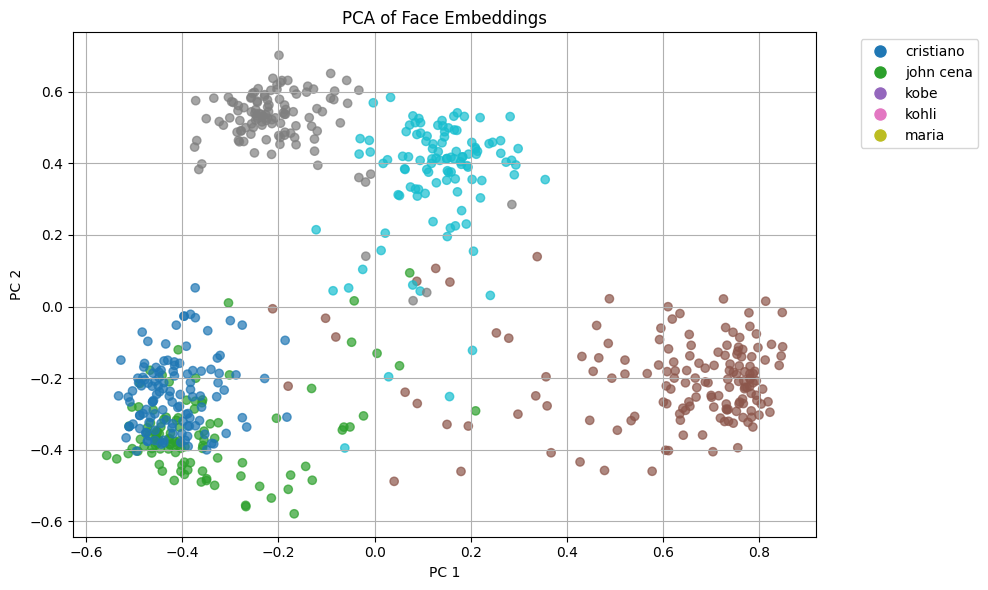

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


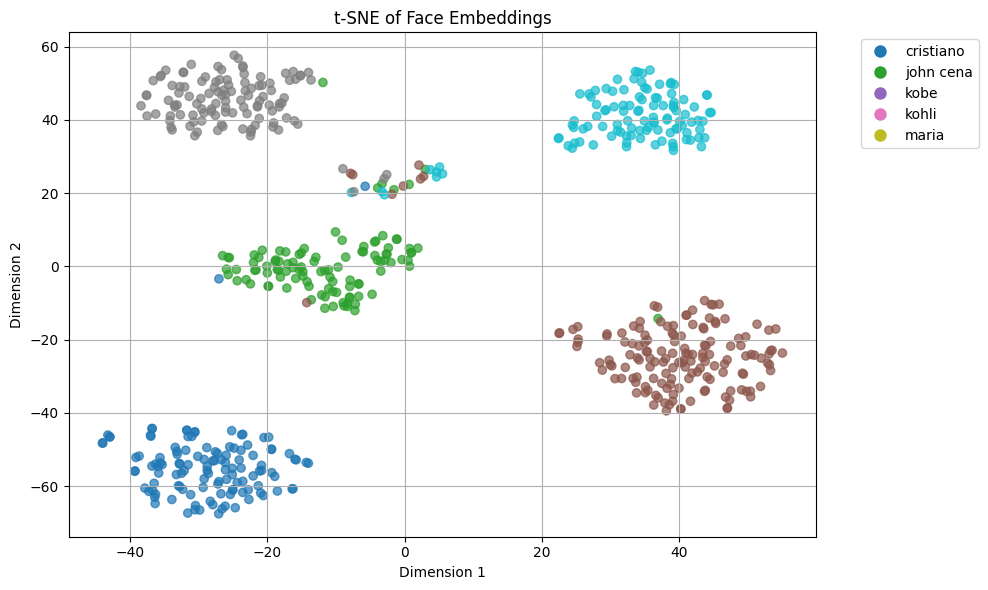

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D

# Load embeddings and labels
embedding_array = np.load('embeddings.npy')
name_array = np.load('names.npy')

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(name_array)
label_names = label_encoder.classes_

# ------------------------
# PCA Visualization (2D)
# ------------------------

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=encoded_labels, cmap='tab10', alpha=0.7)
plt.title('PCA of Face Embeddings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Create legend manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / len(label_names)), markersize=10, label=label)
                   for i, label in enumerate(label_names)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


# ------------------------
# t-SNE Visualization (2D)
# ------------------------

tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=3000)
tsne_result = tsne.fit_transform(embedding_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=encoded_labels, cmap='tab10', alpha=0.7)
plt.title('t-SNE of Face Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Create legend manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / len(label_names)), markersize=10, label=label)
                   for i, label in enumerate(label_names)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import torch
from facenet_pytorch import InceptionResnetV1, MTCNN
from tqdm import tqdm
from PIL import Image
import os

# ------------------------
# Step 1: Load Preprocessed Embeddings and Labels
# ------------------------

# Load the embeddings and labels from the saved .npy files
embedding_array = np.load('embeddings.npy')
name_array = np.load('names.npy')

# Check the shape of the embeddings and labels
print(f"Embeddings shape: {embedding_array.shape}")
print(f"Labels shape: {name_array.shape}")

# ------------------------
# Step 2: Train a Classifier KNN for Recognition
# ------------------------

# Encode the labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(name_array)

# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(embedding_array, encoded_labels)

# ------------------------
# Step 3: Save Classifier for Later Use
# ------------------------

# Save the trained classifier and label encoder for future use
import joblib
joblib.dump(knn, 'knn_classifier.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


Embeddings shape: (604, 512)
Labels shape: (604,)


['label_encoder.pkl']

In [ ]:
# Initialize MTCNN and ResNet for face detection and embeddings
mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')
resnet = InceptionResnetV1(pretrained='vggface2').eval()
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def predict_identity_with_threshold(image, knn, label_encoder, threshold=0.4):
    image = image.convert('RGB')  # Ensure image is in RGB format

    faces, probs = mtcnn(image, return_prob=True)

    if faces is not None:
        for face in faces:
            with torch.no_grad():
                embedding = resnet(face.unsqueeze(0))
            embedding_np = embedding.detach().cpu().numpy()

            # Adjust distance calculation and prediction logic
            distances, indices = knn.kneighbors(embedding_np, n_neighbors=5)  # Using 5 neighbors
            average_distance = np.mean(distances)  # Use average distance instead of min distance

            if average_distance < threshold:
                predicted_label = knn.predict(embedding_np)
                name = label_encoder.inverse_transform(predicted_label)[0]
                print(f"✅ Predicted Name: {name} (Average Distance: {average_distance:.3f})")
            else:
                print(f"❌ Unknown Face (Average Distance: {average_distance:.3f})")
    else:
        print("❌ No face detected in the image.")


In [ ]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for filename in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[filename]))
    predict_identity_with_threshold(image, knn, label_encoder)


Saving download.jpeg to download.jpeg
❌ Unknown Face (Average Distance: 0.620)
